In [36]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob

data = []
images = glob.glob("pokemon-images/images/*png")

for imgName in (range(len(images))):
    imgfile = Image.open(images[imgName])
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    cluster_count = 4

    mclusters = MiniBatchKMeans(n_clusters = cluster_count)
    mclusters.fit(numarray.reshape(-4, 4))

    npbins = numpy.arange(0, cluster_count+1)
    histogram = numpy.histogram(mclusters.labels_, bins=npbins)
    labels = numpy.unique(mclusters.labels_)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(mclusters.labels_, bins=npbins)
    Histsorted = sorted(histogram[0] ,reverse=True)
    labels = numpy.unique(mclusters.labels_)

    couleurs = mclusters.cluster_centers_[1:].tolist()

    #Calcul de la taille
    compteur = 0
    for i in range(imgfile.size[0]):
        for j in range(imgfile.size[1]):
            if imgfile.getpixel((i,j)) == (0,0,0,0):
                compteur += 1

    compteur = imgfile.size[0]*imgfile.size[1] - compteur

    imagedata = []
    imagedata.append(couleurs[0])
    imagedata.append(couleurs[1])
    imagedata.append(couleurs[2])
    imagedata.append(compteur)
    imagedata.append(images[imgName])

    data.append(imagedata)


print(data)



#fig1, ax1 = plot.subplots()
#pieColor = []
#for i in range(cluster_count-1):
#    pieColor.append('#%02x%02x%02x' % (math.ceil(couleurs[i][0]),
#        math.ceil(couleurs[i][1]), math.ceil(couleurs[i][2])))
#
#pieList = plot.pie(Histsorted[1:], colors=pieColor)


  
#plot.show()


[[[131.74931129476585, 106.78787878787878, 71.4765840220386, 251.1129476584022], [193.0909090909091, 193.21212121212122, 193.75757575757575, 80.87878787878788], [210.17919075144508, 199.47398843930637, 173.33526011560693, 253.32947976878611], 4389, 'pokemon-images/images/diggersby.png'], [[186.5, 186.5, 188.625, 104.125], [230.5, 229.5, 237.0, 255.0], [82.80232558139535, 106.90697674418605, 140.88372093023256, 252.43023255813952], 1135, 'pokemon-images/images/poliwag.png'], [[101.11554192229039, 110.53680981595092, 153.12269938650303, 252.2883435582822], [180.1032028469751, 74.16014234875445, 37.91814946619216, 254.57651245551602], [195.27038626609442, 194.4592274678112, 198.02575107296136, 155.77253218884118], 2172, 'pokemon-images/images/gabite.png'], [[183.5, 204.11363636363637, 204.35858585858585, 194.78787878787878], [175.64044943820224, 139.67415730337078, 75.32584269662921, 51.78651685393258], [13.785714285714286, 28.114285714285714, 69.59999999999998, 178.4857142857143], 14400,

In [35]:
import csv


print(data)

with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = ["Nom", "Couleur1.1","Couleur1.2","Couleur1.3", "Couleur1.4", "Couleur2.1","Couleur2.2","Couleur2.3","Couleur2.4", "Couleur3.1", "Couleur3.2", "Couleur3.3", "Couleur3.4", "Taille"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    
    for i in data:
        writer.writerow({'Nom': i[4],
                        'Couleur1.1': i[0][0], 
                         'Couleur1.2': i[0][1],
                        'Couleur1.3' : i[0][2],
                        'Couleur1.4': i[0][3],
                        'Couleur2.1': i[1][0],
                        'Couleur2.2': i[1][1],
                        'Couleur2.3': i[1][2],
                        'Couleur2.4': i[1][3],
                        'Couleur3.1': i[2][0],
                        'Couleur3.2': i[2][1],
                        'Couleur3.3': i[2][2],
                        'Couleur3.4': i[2][3],
                        'Taille': i[3]})

 

[[[146.90655614167295, 122.05501130369254, 86.715146948003, 250.7211755840241], [211.72989195678275, 202.83193277310923, 183.68787515006002, 223.75510204081633], [95.57929883138563, 73.3238731218698, 42.1118530884808, 252.2186978297162], 4389, 'pokemon-images/images/diggersby.png'], [[233.3968253968254, 235.76190476190476, 242.23809523809524, 243.12698412698413], [55.04761904761905, 67.71428571428571, 87.65079365079364, 253.11111111111111], [112.66386554621849, 137.6638655462185, 173.25210084033614, 247.85714285714286], 1135, 'pokemon-images/images/poliwag.png'], [[199.02439024390245, 82.92682926829268, 42.292682926829265, 255.0], [95.92896174863388, 104.93442622950819, 145.72677595628414, 252.5846994535519], [192.57692307692307, 191.92307692307693, 192.69230769230768, 139.92307692307693], 2172, 'pokemon-images/images/gabite.png'], [[180.82258064516128, 192.33064516129033, 193.17741935483872, 182.3548387096774], [189.41666666666666, 85.58333333333333, 8.291666666666666, 0.5833333333333

Select your favorite Pokemon larvitar
processing data
search in data
FourCarac
done


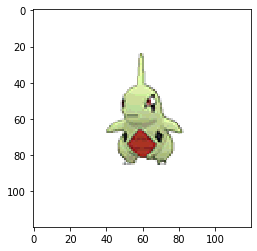

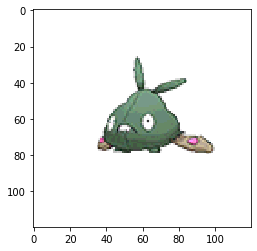

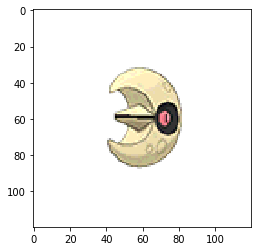

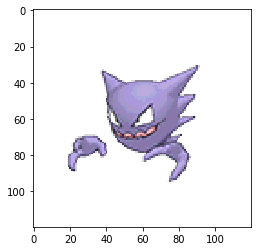

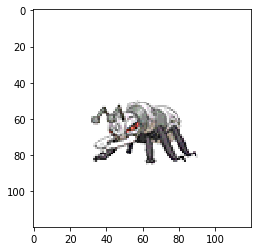

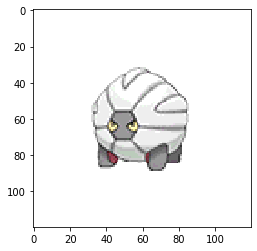

In [114]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file = open('data.csv', 'r')

pokemon = input("Select your favorite Pokemon ")

pokemonTaille = []
pokemonFirstColor = []
pokemonSecondColor = []
pokemonThirdColor = []

reader = csv.reader(file, delimiter=',')

for row in reader:
    if(row[0][22:-4] == pokemon):
        pokemondata = row
        
file = open('data.csv', 'r')

reader = csv.reader(file, delimiter=',')
print("processing data")
for row in reader:
    
    #check if the pokemon is not the same
    if(row[0][22:-4] == pokemon):
        continue

    #Search for the same size
    if(abs(int(row[13]) - int(pokemondata[13])) < 500):
        pokemonTaille.append(row[0])
    
    #Search for the same first color
    if(abs(float(row[1]) - float(pokemondata[1])) < 10
            and abs(float(row[2]) - float(pokemondata[2]) < 10)
            and abs(float(row[3]) - float(pokemondata[3]) < 10)):
        pokemonFirstColor.append(row[0])
        
    #Search for the same second color
    if(abs(float(row[5]) - float(pokemondata[5])) < 10
            and abs(float(row[6]) - float(pokemondata[6]) < 50)
            and abs(float(row[7]) - float(pokemondata[7]) < 50)):
        pokemonSecondColor.append(row[0])
        
    #Search for the same third color
    if(abs(float(row[9]) - float(pokemondata[9])) < 50
            and abs(float(row[10]) - float(pokemondata[10]) < 50)
            and abs(float(row[11]) - float(pokemondata[11]) < 50)):
        pokemonThirdColor.append(row[0])

TwoCarac = []
ThreeCarac = []
FourCarac = []

print("search in data")
for taille in pokemonTaille:
    for firstColor in pokemonFirstColor:
        if(taille == firstColor):
            TwoCarac.append(taille)
    
        for SecondColor in pokemonSecondColor:
            if(taille == firstColor and firstColor == SecondColor):
                ThreeCarac.append(taille)
            
            for ThirdColor in pokemonThirdColor:
                if(taille == firstColor and firstColor == SecondColor and SecondColor == ThirdColor):
                    FourCarac.append(taille)
        

plt.figure()
plt.imshow(mpimg.imread('pokemon-images/images/' + pokemon + '.png'))

if(len(FourCarac) != 0):
    print('FourCarac')
    for i in range(5):
        plt.figure()
        plt.imshow(mpimg.imread(FourCarac[i]))
elif(len(ThreeCarac) != 0):
    print('ThreeCarac')
    for i in range(5):
        plt.figure()
        plt.imshow(mpimg.imread(ThreeCarac[i]))
elif(len(TwoCarac) != 0):
    print('TwoCarac')
    for i in range(5):
        plt.figure()
        plt.imshow(mpimg.imread(TwoCarac[i]))

    

    
print('done')
    

Select your favorite Pokemon ekans
processing data
14


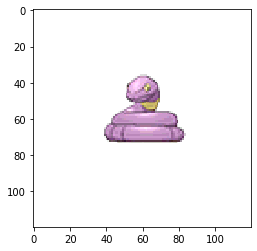

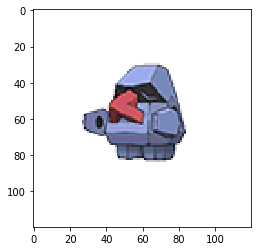

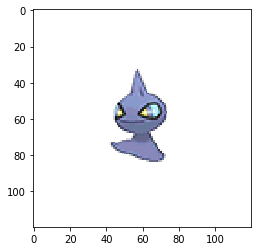

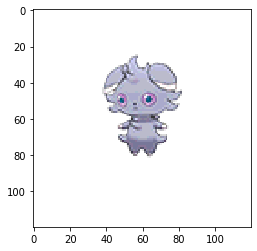

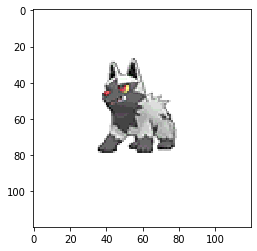

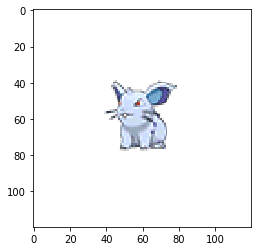

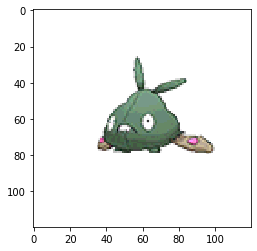

In [91]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

file = open('data.csv', 'r')

pokemon = input("Select your favorite Pokemon ")

pokemonFound = []


reader = csv.reader(file, delimiter=',')

for row in reader:
    if(row[0][22:-4] == pokemon):
        pokemondata = row
        
file = open('data.csv', 'r')

reader = csv.reader(file, delimiter=',')
print("processing data")
for row in reader:
    
    #check if the pokemon is not the same
    if(row[0][22:-4] == pokemon):
        continue
        
    else:
        #Search for the same first color
        FirstColor = sRGBColor(float(pokemondata[1]), float(pokemondata[2]), float(pokemondata[3]))
        iteratedColor = sRGBColor(float(row[1]), float(row[2]), float(row[3]))

        #Processing first color
        color1_lab = convert_color(FirstColor, LabColor)

        color2_lab = convert_color(iteratedColor, LabColor)

        delta_e = delta_e_cie2000(color1_lab, color2_lab);

        #Processing second color
        SecondColor = sRGBColor(float(pokemondata[5]), float(pokemondata[6]), float(pokemondata[7]))
        iteratedColor = sRGBColor(float(row[5]), float(row[6]), float(row[7]))

        color1_lab_1 = convert_color(SecondColor, LabColor)

        color2_lab_1 = convert_color(iteratedColor, LabColor)

        delta_e_2 = delta_e_cie1976(color1_lab_1, color2_lab_1);


        #Processing third color
        ThirdColor = sRGBColor(float(pokemondata[9]), float(pokemondata[10]), float(pokemondata[11]))
        iteratedColor2 = sRGBColor(float(row[9]), float(row[10]), float(row[11]))

        color1_lab_2 = convert_color(ThirdColor, LabColor)

        color2_lab_2 = convert_color(iteratedColor2, LabColor)

        delta_e_3 = delta_e_cie2000(color1_lab_2, color2_lab_2);


        if(((delta_e < 20) and abs(int(row[13]) - int(pokemondata[13])) < 500)
          or ((delta_e_2 < 20) and abs(int(row[13]) - int(pokemondata[13])) < 500)
        or ((delta_e_3 < 20) and abs(int(row[13]) - int(pokemondata[13])) < 500)):
            pokemonFound.append(row[0])

print(len(pokemonFound))
        
plt.figure()
plt.imshow(mpimg.imread(pokemondata[0]))

        
for i in range(len(pokemonFound)):
    if(i<6):
        plt.figure()
        plt.imshow(mpimg.imread(pokemonFound[i]))
    

    